# PyTorch 基本操作

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as plt_cl

In [5]:
def beale(x1,x2):
    return (1.5 - x1 + x1*x2)**2 + (2.25 - x1 + x1*x2**2)**2 + (2.625 - x1 + x1*x2**3)**2

def dbeale_dx(x1, x2):
    dfdx1 = 2*(1.5 - x1 + x1*x2)*(x2-1) + 2*(2.25 - x1 + x1*x2**2)*(x2**2-1) + 2*(2.625 - x1 + x1*x2**3)*(x2**3-1)
    dfdx2 = 2*(1.5 - x1 + x1*x2)*x1 + 2*(2.25 - x1 + x1*x2**2)*(2*x1*x2) + 2*(2.625 - x1 + x1*x2**3)*(3*x1*x2**2)
    return dfdx1, dfdx2

## 生成矩阵

In [8]:
X1 = torch.zeros(3, 4) # 生成 3 x 4 的零矩阵
print(X1)

X2 = torch.rand(2, 3) # 从 [0, 1) 的均匀分布生成矩阵
print(X2)

X3 = torch.randn(3, 2) # 从标准正态分布生成矩阵
print(X3)

X4 = torch.zeros_like(X3) # 生成和 X3 形状一致的零矩阵
print(X4)

X_ = np.array([[1,2,3],[4,5,6]])
X5 = torch.tensor(X_) # 从 NumPy 矩阵生成
print(X5)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.6145, 0.8132, 0.6581],
        [0.3256, 0.0343, 0.1210]])
tensor([[ 1.3513,  0.5093],
        [-2.1713, -0.2622],
        [-1.2113,  0.0150]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)


## 矩阵运算

In [22]:
# 矩阵按元素相乘
M1 = X2 * X5
print(M1)

# 矩阵乘法
M2 = torch.mm(X2, X3)
print(M2)

M2 = X2.mm(X3)
print(M2)

tensor([[0.6145, 1.6264, 1.9743],
        [1.3024, 0.1716, 0.7258]])
tensor([[-1.7325,  0.1096],
        [ 0.2189,  0.1586]])
tensor([[-1.7325,  0.1096],
        [ 0.2189,  0.1586]])


## 矩阵变形

In [11]:
M1_ = M1.view(-1) # 将 M1 矩阵变为1维
print(M1_)
print(M1_.size())

M2_ = M1_.view(3, 2) # 将 M1_ 矩阵变为 3 x 2 的矩阵
print(M2_)
print(M2_.size())

tensor([0.6145, 1.6264, 1.9743, 1.3024, 0.1716, 0.7258])
torch.Size([6])
tensor([[0.6145, 1.6264],
        [1.9743, 1.3024],
        [0.1716, 0.7258]])
torch.Size([3, 2])


## 矩阵转置

In [19]:
torch.t(X2).size()

torch.Size([3, 2])

# 算法

## Adam

In [17]:
def gd_adam(df_dx, x0, epochs=100, lr=0.001, beta1=0.9, beta2=0.999, eps=1e-8):
    x_list = [] # 记录梯度下降的历史位置
    x_list.append(x0)
    
    t = 0
    vt = np.zeros_like(x0)
    mt = np.zeros_like(x0)
    
    for i in range(epochs):
        t += 1 # 迭代次数不能从0开始
        
        dfdx = np.array(df_dx(x0[0], x0[1])) # 计算当前位置的梯度
        
        vt = beta2 * vt + (1 - beta2) * (dfdx ** 2)
        mt = beta1 * mt + (1 - beta1) * dfdx
        
        vt_ = vt / (1 - beta2 ** t)
        mt_ = mt / (1 - beta1 ** t)
        
        x0 = x0 - (lr / np.sqrt(vt_ + eps)) * mt_
        
        x_list.append(x0)
        
    return x_list

The final solution is (x_1,x_2) = ( 2.649135987259641 , 0.39445668570912706 )


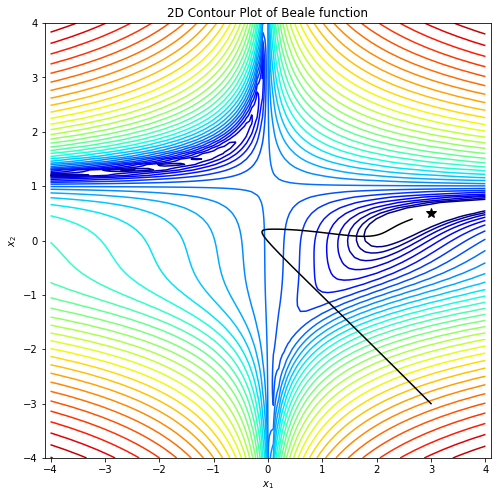

In [24]:
# Test
x0 = np.array([3,-3])
x_traj_adam = gd_adam(dbeale_dx, x0, epochs=1200, lr=0.35)
print("The final solution is (x_1,x_2) = (",x_traj_adam[-1][0],",",x_traj_adam[-1][1],")")

step_x1, step_x2 = 0.1, 0.1
X1, X2 = np.meshgrid(np.arange(-4, 4+step_x1, step_x1), np.arange(-4, 4+step_x2, step_x2))
Y = beale(X1,X2)


plt.rcParams['figure.figsize'] = [8, 8]
plt.contour(X1, X2, Y, levels=np.logspace(0, 5, 35), norm=plt_cl.LogNorm(), cmap=plt.cm.jet)
plt.title('2D Contour Plot of Beale function')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.plot(3,0.5,'k*',markersize=10)
x_traj_adam = np.array(x_traj_adam)
plt.plot(x_traj_adam[:,0],x_traj_adam[:,1],'k-')
plt.show()

## NAG

In [42]:
def nag(df_dx, x0, epochs=100, momentum=0.9, lr=0.1):
    vt = np.zeros_like(x0)
    
    x_list = []
    x_list.append(x0)
    
    for i in range(epochs):
        temp = x0 - momentum * vt
        temp_grad = np.array(df_dx(temp[0], temp[1]))
        
        vt = momentum * vt + lr * temp_grad
        x0 = x0 - vt
        
        x_list.append(x0)
        
    return x_list

The final solution is (x_1,x_2) = ( 2.595599449778273 , 0.379528956529936 )


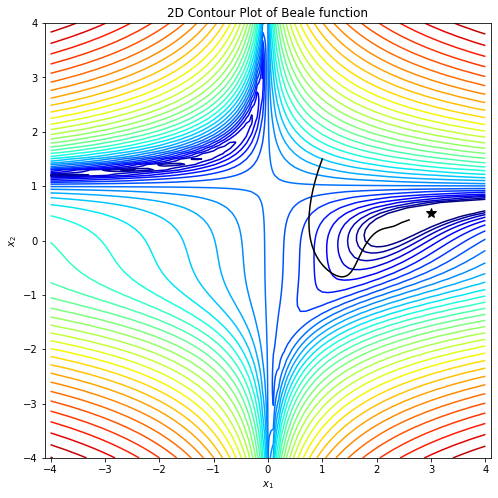

In [63]:
# Test
x0 = np.array([1,1.5])
x_traj_adam = nag(dbeale_dx, x0, epochs=150, momentum=0.9, lr=0.001)
print("The final solution is (x_1,x_2) = (",x_traj_adam[-1][0],",",x_traj_adam[-1][1],")")

step_x1, step_x2 = 0.1, 0.1
X1, X2 = np.meshgrid(np.arange(-4, 4+step_x1, step_x1), np.arange(-4, 4+step_x2, step_x2))
Y = beale(X1,X2)


plt.rcParams['figure.figsize'] = [8, 8]
plt.contour(X1, X2, Y, levels=np.logspace(0, 5, 35), norm=plt_cl.LogNorm(), cmap=plt.cm.jet)
plt.title('2D Contour Plot of Beale function')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.plot(3,0.5,'k*',markersize=10)
x_traj_adam = np.array(x_traj_adam)
plt.plot(x_traj_adam[:,0],x_traj_adam[:,1],'k-')
plt.show()

## RMSProp

In [67]:
def rmsprop(df_dx, x0, epochs=100, gamma=0.9, lr=0.01):
    vt = np.zeros_like(x0)
    r = np.zeros_like(x0)
    eps = 1e-8
    
    x_list = []
    x_list.append(x0)
    
    for i in range(epochs):
        g = np.array(df_dx(x0[0], x0[1]))
        r = gamma * r+ (1 - gamma) * (g**2)
        
        theta = - (lr / np.sqrt(eps + r) ) * g
        x0 = x0 + theta
        
        x_list.append(x0)
        
    return x_list

The final solution is (x_1,x_2) = ( 2.9005458132047957 , 0.47570505182846573 )


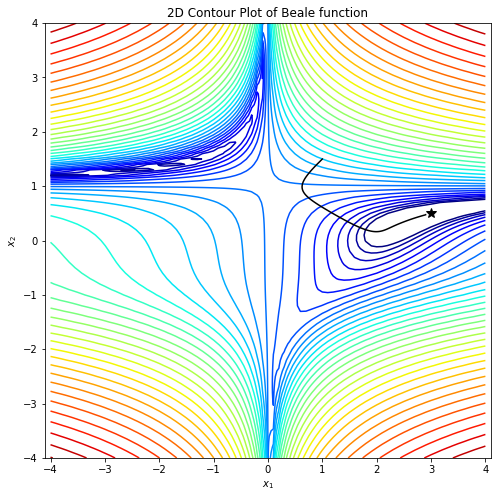

In [74]:
# Test
x0 = np.array([1,1.5])
x_traj_adam = rmsprop(dbeale_dx, x0, epochs=120, gamma=0.9, lr=0.04)
print("The final solution is (x_1,x_2) = (",x_traj_adam[-1][0],",",x_traj_adam[-1][1],")")

step_x1, step_x2 = 0.1, 0.1
X1, X2 = np.meshgrid(np.arange(-4, 4+step_x1, step_x1), np.arange(-4, 4+step_x2, step_x2))
Y = beale(X1,X2)


plt.rcParams['figure.figsize'] = [8, 8]
plt.contour(X1, X2, Y, levels=np.logspace(0, 5, 35), norm=plt_cl.LogNorm(), cmap=plt.cm.jet)
plt.title('2D Contour Plot of Beale function')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.plot(3,0.5,'k*',markersize=10)
x_traj_adam = np.array(x_traj_adam)
plt.plot(x_traj_adam[:,0],x_traj_adam[:,1],'k-')
plt.show()

## AdaDelta

In [102]:
def adadelta(df_dx, x0, epochs=100, gamma=0.9):
    x_ = np.zeros_like(x0)
    r = np.zeros_like(x0)
    eps = 1e-8
    
    x_list = []
    x_list.append(x0)
    
    for i in range(epochs):
        g = np.array(df_dx(x0[0], x0[1]))
        r = gamma * r + (1 - gamma) * (g ** 2)
        
        delta = - (np.sqrt(x_ + eps) / np.sqrt(eps + r) ) * g
        x_ = gamma * x_ + (1 - gamma) * (delta ** 2)
        
        x0 = x0 + delta
        
        x_list.append(x0)
        
    return x_list

The final solution is (x_1,x_2) = ( 2.974583236543048 , 0.4925786633137082 )


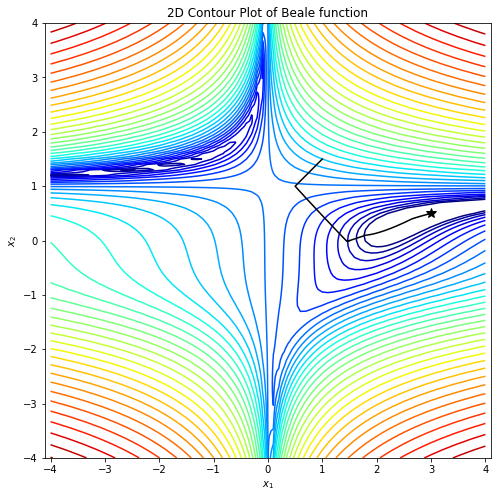

In [131]:
# Test
x0 = np.array([1,1.5])
x_traj_adam = adadelta(dbeale_dx, x0, epochs=1500, gamma=0.001)
print("The final solution is (x_1,x_2) = (",x_traj_adam[-1][0],",",x_traj_adam[-1][1],")")

step_x1, step_x2 = 0.1, 0.1
X1, X2 = np.meshgrid(np.arange(-4, 4+step_x1, step_x1), np.arange(-4, 4+step_x2, step_x2))
Y = beale(X1,X2)


plt.rcParams['figure.figsize'] = [8, 8]
plt.contour(X1, X2, Y, levels=np.logspace(0, 5, 35), norm=plt_cl.LogNorm(), cmap=plt.cm.jet)
plt.title('2D Contour Plot of Beale function')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.plot(3,0.5,'k*',markersize=10)
x_traj_adam = np.array(x_traj_adam)
plt.plot(x_traj_adam[:,0],x_traj_adam[:,1],'k-')
plt.show()